In [7]:
#import statements
import random
import numpy
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.special

In [8]:
#Exercise 1.4

#used Make Your Own Neural Netwok by Rashid

#function
def function(x1, x2):
    #function is simply if x1*x2 > 99,
    #return 1, otherwise return -1
    y = x1*x2
    if y > 99:
        return 1
    return -1
        
#creating the dataset
n = 20
m = 3
a = [None]*n
for i in range(0,20):
    x = [None]*m
    for j in range(0,2):
        x[j] = random.randint(0,25)
    x[2] = function(x[0],x[1])
    a[i] = x

# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [11]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

print(n.query(a))

[[0.55583741 0.50651436 0.50132821 0.64341787 0.63643509 0.5105982
  0.50051685 0.50880138 0.6808191  0.53536782 0.50397107 0.63643509
  0.67072376 0.50149017 0.60186333 0.69247533 0.61573341 0.50413186
  0.50194104 0.506018  ]
 [0.45760923 0.48788712 0.48402209 0.47183451 0.47725826 0.48694299
  0.49435947 0.47660375 0.45774299 0.4808179  0.47855344 0.47725826
  0.45610712 0.49104716 0.4765695  0.45552921 0.4735873  0.48202466
  0.48278836 0.46866664]
 [0.62800316 0.52569134 0.52027949 0.75339458 0.74747875 0.5346092
  0.50728512 0.54099479 0.79541149 0.5869768  0.53058509 0.74747875
  0.7834077  0.51273964 0.70506016 0.80636326 0.72143356 0.52730861
  0.52263062 0.54418951]]


v1: 0.499728000000007
vrand: 0.49966599999999717
vmin: 0.03758699999997677
Mean: 0.34566033333332696


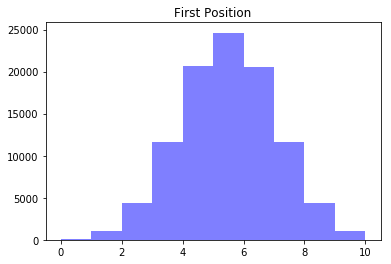

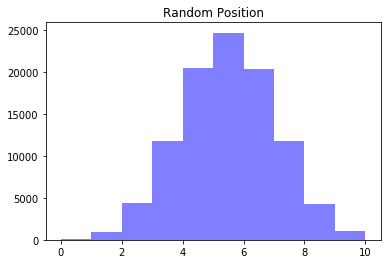

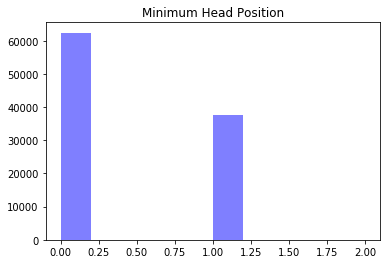

In [29]:
#Exercise 1.10
def exercise10():
    oneArray = [None] * 100000
    randArray = [None] * 100000
    minArray = [None] * 100000
    v1Sum = 0
    vrandSum = 0
    vminSum = 0
    for j in range(0, 100000):
        headCountArray = [None] * 1000
        #positions of cmin, crand, and c1
        cmin = 0
        crand = random.randint(0,999)
        c1 = 0
        #cmax = 0

        #1000 trials
        for x in range(0,1000):
            #ten flips, heads is random = 1, increment count for x
            count = 0
            for i in range(0,10):
                if (random.randint(0,1) == 1):
                    count += 1
            headCountArray[x] = count

            #updates minimum frequency of heads
            if (headCountArray[cmin] > headCountArray[x]):
                cmin = x

        v1 = headCountArray[c1] / 10
        vrand = headCountArray[crand] / 10
        vmin = headCountArray[cmin] / 10
        
        oneArray[j] = headCountArray[c1]
        randArray[j] = headCountArray[crand]
        minArray[j] = headCountArray[cmin]

        v1Sum += v1
        vrandSum += vrand
        vminSum += vmin
        if (j == 99999):
            v1 = v1Sum/100000
            vrand = vrandSum/100000
            vmin = vminSum/100000
            print("v1:", v1)
            print("vrand:", vrand)
            print("vmin:", vmin)

            u = (v1 + vrand + vmin)/3
            print("Mean:", u)
    
    #print(oneArray)
    n, bins, patches = plt.hist(oneArray, 10, facecolor='blue', alpha=0.5)
    plt.title("First Position")
    plt.show()
    #print(randArray)
    n, bins, patches = plt.hist(randArray, 10, facecolor='blue', alpha=0.5)
    plt.title("Random Position")
    plt.show()
    #print(minArray)
    n, bins, patches = plt.hist(minArray, 10, facecolor='blue', alpha=0.5)
    plt.title("Minimum Head Position")
    plt.show()
    
    

exercise10()